<a href="https://colab.research.google.com/github/advait-t/Machine-Learning/blob/master/ML_EX1_10_7_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

data = pd.read_csv(filename, names = headers)

## QUESTION 1: 
### Read the first 5 lines and display

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## QUESTION 2:
### Are there missing data? Or illegal characters in the dataframe?

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## QUESTION 3: 
### Replace the character “?” with nan

In [ ]:
data.replace("?",np.nan, inplace = True)

## QUESTION 4: 
### Count missing values in each column and print it with column name

In [ ]:
missing_values_table(data)

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-doors,2,1.0
horsepower,2,1.0
peak-rpm,2,1.0


## QUESTION 5: 
### Delete price rows that have missing data

In [ ]:
data.dropna(subset = ['price'],inplace = True)

## QUESTION 6: 
### Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column

In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
data['normalized-losses'].replace(np.nan,(data['normalized-losses'].astype('float').mean(axis=0)),inplace = True)

In [ ]:
data['bore'].replace(np.nan,(data['bore'].astype('float').mean(axis = 0)), inplace = True)

In [ ]:
data['stroke'].replace(np.nan,(data['stroke'].astype('float').mean(axis = 0)), inplace = True)

In [ ]:
data['horsepower'].replace(np.nan,(data['horsepower'].astype('float').mean(axis = 0)), inplace = True)

In [ ]:
data['peak-rpm'].replace(np.nan,(data['peak-rpm'].astype('float').mean(axis = 0)), inplace = True)

## QUESTION 7: 
### Num-of-doors replace missing with most frequent value in the column

In [ ]:
data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [ ]:
data['num-of-doors'].replace(np.nan,'four',inplace = True)

## QUESTION 8: 
### Reset the index of dataframe

In [ ]:
data.reset_index(inplace = True)

## QUESTION 9: 
### Check datatype of columns and convert numeric/quantitative variables to float or int

In [ ]:
data.dtypes

index                  int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
convert_dict = {'normalized-losses': float,'bore':float,'stroke':float,'horsepower':float,'peak-rpm': float,'price':float}
data = data.astype(convert_dict) 

## QUESTION 10: 
### Transform city-mpg and highway-mpg into liters/100km using conversion formula: L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”


In [ ]:
data['city-L/100km'] = 235/data["city-mpg"]
data['highway-L/100km'] = 235/data["highway-mpg"]

## QUESTION 11: 
### Normalize columns length, width, height so that their values range from 0 to 1

In [ ]:
data['length']=data['length']/(data['length'].max())
data['width']=data['width']/(data['width'].max())
data['height']=data['height']/(data['height'].max())

## QUESTION 12: 
### Plot the histogram of horsepower to see its distribution

AxesSubplot(0.125,0.125;0.775x0.755)


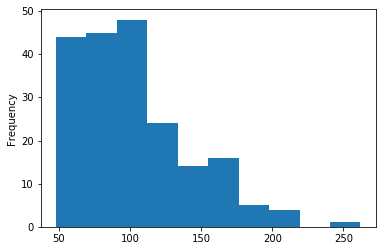

In [ ]:
print(data.horsepower.plot(kind = 'hist'))

## QUESTION 13: 
### Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [ ]:
#Create a binning function
def binning(col, cut_points, labels=None):
  
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #Create a list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #If no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
  return colBin

#Binning LoanAmount variable:
cut_points = [120,192]
labels = ["low","medium","high"]
data["horsepower-binned"] = binning(data["horsepower"], cut_points, labels)
print (pd.value_counts(data["horsepower-binned"], sort=False))

low       154
medium     42
high        5
Name: horsepower-binned, dtype: int64


In [ ]:
data.head()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,low
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,low
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,medium
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,low
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,low


## QUESTION 14:
### Plot distribution of “horsepower-binned”

(array([154.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

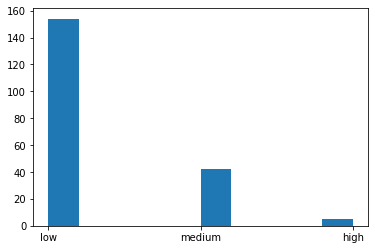

In [ ]:
plt.hist(data['horsepower-binned'])

## QUESTION 15: 
### Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”

In [ ]:
one_hot1 = pd.get_dummies(data['fuel-type'])
one_hot2 = pd.get_dummies(data['aspiration'])
data = data.join(one_hot1)
data = data.join(one_hot2)
data.drop("fuel-type", axis = 1, inplace=True)
data.drop("aspiration", axis = 1, inplace=True)